Израсходовав  15000 килограмм топлива, ракета будет находиться на высоте H =  91410.2 метров, двигаясь со скоростью V =  6801.9 метров/секунду


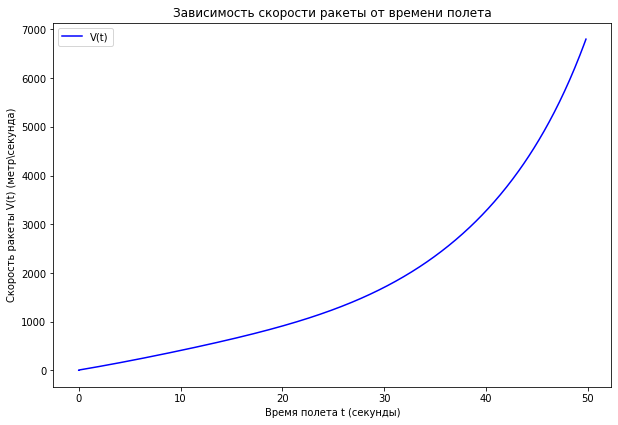

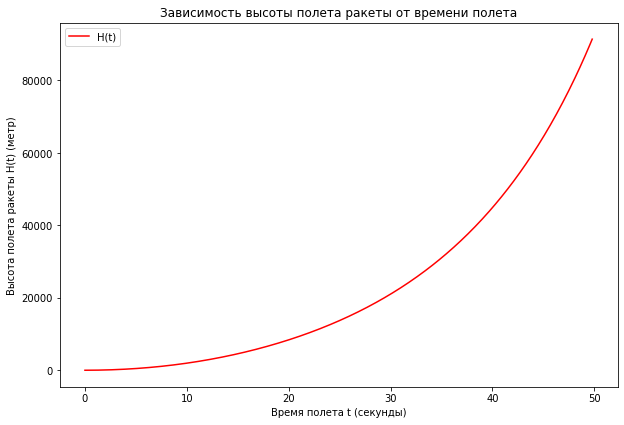

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Mon Nov 16 16:04:39 2020

@author: Владимир
"""

import math as m
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp

p_mass = 20000 # начальная масса
z_n = 0 #высота над стартовой площадкой
M = 300 #скорость расхода топлива
u = 3000 #скорость истечения газа
i_mass = 15000 #масса сгораемого топлива
q_n = 0.8 #начальная  плотность воздуха
g= 9.8
t = 0 #время в секундах
h = 0.1
n = int(i_mass / M / h)
        
def F(m, x, v):
    return (((u + v) * M - q_n * np.exp(-0.00014 * x)* v * v) / m - g)
 
T = np.zeros(n)
T[0] = t                              
v1 = np.zeros(n)
v2 = np.zeros(n)
v3 = np.zeros(n)
v4 = np.zeros(n)
v = np.zeros(n)
v[0] = 0 #начальная скорость
x = np.zeros(n)
x[0] = z_n

mk = p_mass - i_mass
m = p_mass


for i in range(0, n-1):
    if m > mk :
        m = p_mass - M * (h * i)
        v1[i+1] = h * F(m,x[i], v[i])
        v2[i+1] = h * F(m,x[i] + h / 2.0, v[i] + v1[i+1] / 2.0)
        v3[i+1] = h * F(m,x[i] + h / 2, v[i] + v2[i+1] / 2)
        v4[i+1] = h * F(m,x[i] + h, v[i] + v3[i+1])
        v[i+1] = v[i] + (v1[i+1] + 2 * v2[i+1] + 2 * v3[i+1] + v4[i+1]) / 6
        x[i + 1] = x[i] + v[i] * h
        T[i+1] = i * h
     
plt.figure(figsize=(10, 6.7))
plt.title('Зависимость скорости ракеты от времени полета')
plt.xlabel('Время полета t (секунды)')
plt.ylabel('Скорость ракеты V(t) (метр\секунда)') 
plt.plot(T, v, color = 'blue', linestyle = 'solid', label = 'V(t)') 
plt.legend(loc = 'upper left')  


plt.figure(figsize=(10, 6.7))
plt.title('Зависимость высоты полета ракеты от времени полета')
plt.xlabel('Время полета t (секунды)')
plt.ylabel('Высота полeта ракеты H(t) (метр)') 
plt.plot(T, x, color = 'red', linestyle = 'solid', label = 'H(t)') 
plt.legend(loc = 'upper left')  

print("Израсходовав ", i_mass, "килограмм топлива, ракета будет находиться на высоте H = ", round(x[n-1],1), "метров, двигаясь со скоростью V = ", round(v[n-1],1), "метров/секунду")    




